# 3y Reverse Convertible

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [7]:
#coupon is 0.08
#maturity is 3
#spot 100, strike 75
def rev_conv(x, spot, barrier, maturity, coupon):
    strike = spot - barrier
    answer = []
    i = 0
    while i < len(x):
        if x[i] >= spot:
            ans = 100*coupon*maturity
            answer.append(ans)
        else:
            ans = x[i] - (100-maturity*coupon*100)
            answer.append(ans)
        i += 1
    return answer

In [8]:
def ungerlying(x):
    x = np.array(x)
    return x - 100

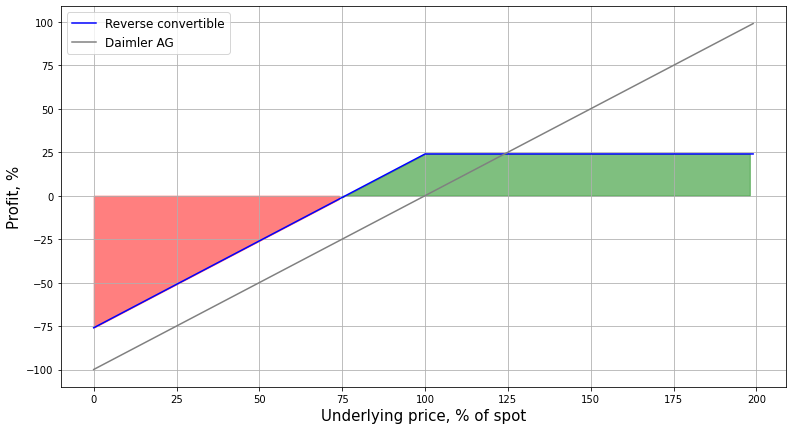

In [9]:
S = [t for t in range(0,200)]
prof = rev_conv(S, 100, 25, 3, 0.08)
fig = plt.figure(figsize=(13, 7))
plt.plot(S, prof, 'blue')
plt.plot(S, ungerlying(S), 'grey')
plt.grid()
plt.legend(["Reverse convertible", 'Daimler AG'], fontsize=12)
plt.ylabel("Profit, %", fontsize=15)
plt.xlabel("Underlying price, % of spot", fontsize=15)
plt.fill_between(S[75:199], prof[75:199], 0, color='g', alpha=.5)
plt.fill_between(S[0:75], prof[0:75], 0, color='r', alpha=.5)

plt.show()